In [1]:
from sklearn import tree
from sklearn.datasets import load_wine 

In [2]:
# 红酒数据集
datas = load_wine()

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# 数据
print(pd.DataFrame(datas.data).head())
# 类别
print(pd.Series(datas.target).unique())
# 合并
print(pd.concat([pd.DataFrame(datas.data), pd.DataFrame(datas.target)],axis=1).head())


      0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0  
[0 1 2]
      0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.3

In [5]:
# 数据分割
from sklearn.model_selection import train_test_split

In [6]:
print(datas.data.shape, datas.target.shape)

(178, 13) (178,)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(datas.data, datas.target, test_size=0.3)

[0 1 2]


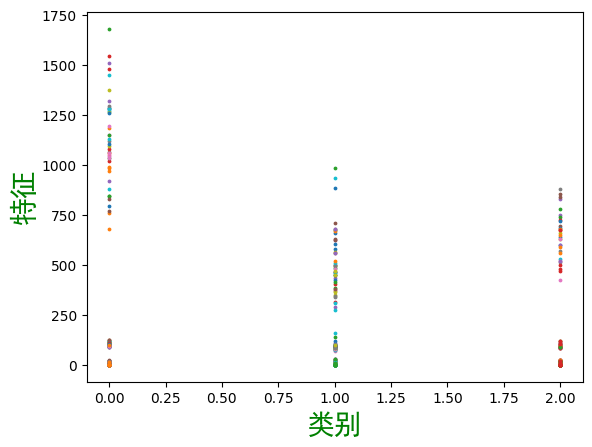

In [8]:
# 类别
print(pd.Series(datas.target).unique())
plt.xlabel('类别',family='simhei',c='g',size=20)
plt.ylabel('特征',family='simhei',c='g',size=20)
for k in range(x_train.shape[0]):
    plt.scatter([y_train[k]]*len(x_train[k]), x_train[k],s=3)

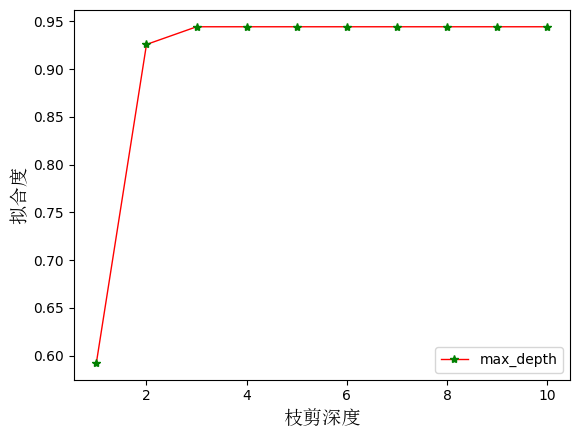

In [9]:
# max_depth学习曲线
scores = []
for k in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth=k,
                                      random_state=30,
                                      criterion='entropy')
    clf.fit(x_train,y_train)
    scores.append(clf.score(x_test,y_test))
plt.plot(range(1,11), scores, '*-r',mec='g',mfc='g',lw=1,label='max_depth')
plt.xlabel('枝剪深度',family='SimSun',size=14)
plt.ylabel('拟合度',family='SimSun',size=14)
plt.legend(loc='lower right')
plt.show()

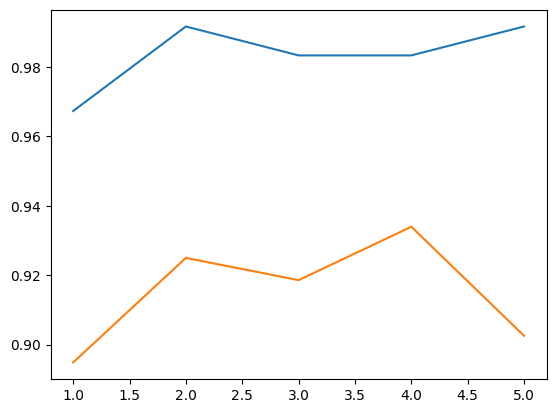

In [10]:
# 决策树与随机森林
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25)
dtc = tree.DecisionTreeClassifier()

# 模型评估-交叉验证
from sklearn.model_selection import cross_val_score
n_val = 5
# n_val组10折交叉验证
rfc_sl, dtc_sl = [], []
for k in range(n_val):
    rfc_s = cross_val_score(rfc, x_train, y_train, cv=10).mean()
    dtc_s = cross_val_score(dtc, x_train, y_train, cv=10).mean()
    rfc_sl.append(rfc_s)
    dtc_sl.append(dtc_s)
    
# 交叉验证学习曲线
plt.plot(range(1, n_val+1), rfc_sl, range(1, n_val+1), dtc_sl)

CPU times: total: 5.8 s
Wall time: 5.81 s


Text(0, 0.5, '准确率')

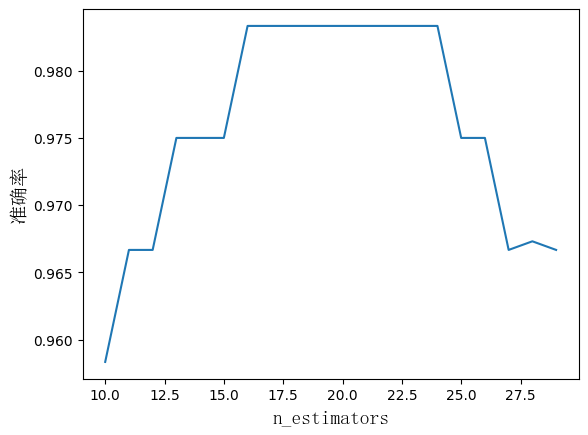

In [11]:
%%time
# n_estimators学习曲线
rfc_cross_val = []
n_estimators = []
for n_e in range(10, 30):
    rfc = RandomForestClassifier(n_estimators=n_e, random_state=30)
    rfc_cross_val.append(cross_val_score(rfc, x_train, y_train, cv=10).mean())
    n_estimators.append(n_e)
plt.plot(n_estimators, rfc_cross_val)
plt.xlabel('n_estimators',family='SimSun',size=14)
plt.ylabel('准确率',family='SimSun',size=14)

In [12]:
rfc = RandomForestClassifier(n_estimators=10, random_state=30).fit(x_train, y_train)

In [13]:
rfc_s = rfc.score(x_train,y_train)
print('score:',rfc_s)
res1 = rfc.predict(x_test)
res2 = rfc.predict_proba(x_test)
print(res1.shape)
print(res1[0:5])
print(res2.shape)
print(res2[0:5])

score: 1.0
(54,)
[1 2 0 1 1]
(54, 3)
[[0.  1.  0. ]
 [0.1 0.2 0.7]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]]
